In [1]:
import sys
sys.path.append("../library")

from thinkbayes2 import Suite, Pmf, Cdf, SampleSum, MakePmfFromList, MakeMixture
import thinkplot

# Odds

In [2]:
# class Die, refer to https://github.com/AllenDowney/ThinkBayes2/blob/master/code/chap05.ipynb
class Die(Pmf):
    def __init__(self, sides):
        super().__init__()
        for x in range(1, sides+1):
            self.Set(x, 1)
        self.Normalize()
    
    def __add__(self, other):
#         solution 2: enumration for all cases
        pmf = Pmf()
        for v1, p1 in self.Items():
            for v2, p2 in other.Items():
                pmf.Incr(v1+v2, p1*p2)
        return pmf

In [3]:
# solution 1: simulation
d6 = Die(6)
dice = [d6] * 3
three = SampleSum(dice, 1000)
# solution 2: enumration for real value
three_exact = d6 + d6 + d6

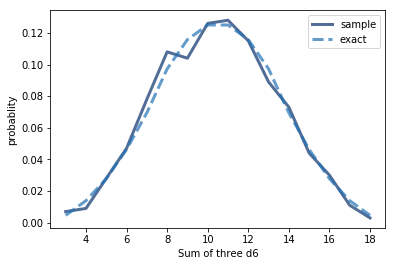

In [4]:
thinkplot.PrePlot(1)
thinkplot.Pdf(three,  label='sample')
# refer to https://stackoverflow.com/questions/13359951/is-there-a-list-of-line-styles-in-matplotlib
thinkplot.Pdf(three_exact, linestyle='--', label='exact')
thinkplot.Show(xlabel='Sum of three d6', ylabel='probablity')

# Maximum

In [5]:
# 1. Simulation case
# define RandomMax and SampleMax
def RandomMax(dists):
    total = max(dist.Random() for dist in dists)
    return total

def SampleMax(dists, n):
    pmf = MakePmfFromList(RandomMax(dists) for i in range(n))
    return pmf

In [6]:
# 2. Enumation case
def PmfMax(pmf1, pmf2):
    res = Pmf()
    for v1, p1 in pmf1.Items():
        for v2, p2 in pmf2.Items():
            res.Incr(max(v1, v2), p1 * p2)
    return res

In [7]:
# run solution
d6 = Die(6)
dice = [d6] * 3
three_max = SampleMax(dice, 1000)
three_max_exact = PmfMax(PmfMax(d6, d6), d6)

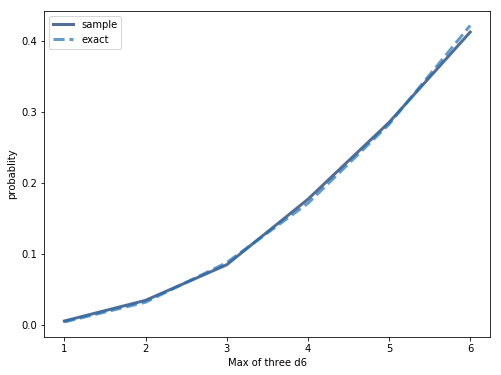

In [8]:
thinkplot.PrePlot(1)
thinkplot.Pdf(three_max,  label='sample')
# refer to https://stackoverflow.com/questions/13359951/is-there-a-list-of-line-styles-in-matplotlib
thinkplot.Pdf(three_max_exact, linestyle='--', label='exact')
thinkplot.Show(xlabel='Max of three d6', ylabel='probablity')

In [9]:
# convert to cdfs from pmfs
d6_three_max_cdf = three_max.Max(6)
d6_three_max_pmf = d6_three_max_cdf.MakePmf()

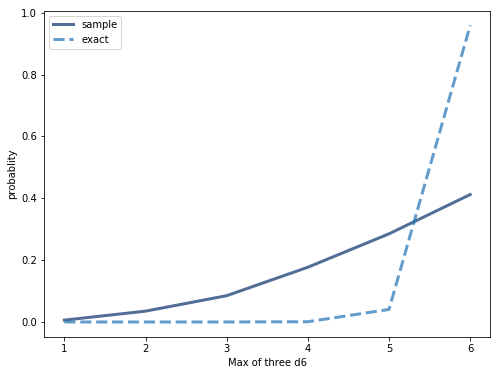

In [10]:
thinkplot.PrePlot(1)
thinkplot.Pdf(three_max,  label='sample')
# refer to https://stackoverflow.com/questions/13359951/is-there-a-list-of-line-styles-in-matplotlib
thinkplot.Pdf(d6_three_max_pmf, linestyle='--', label='exact')
thinkplot.Show(xlabel='Max of three d6', ylabel='probablity')

# Mixture distribution

In [11]:
d6 = Die(6)
d8 = Die(8)
mix = Pmf()
# equal probablity for d6 and d8
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize()

1.9999999999999996

In [12]:
# generate distribiont of pmf_dice
pmf_dice = Pmf()
pmf_dice.Set(Die(4), 2)
pmf_dice.Set(Die(6), 3)
pmf_dice.Set(Die(8), 2)
pmf_dice.Set(Die(12), 1)
pmf_dice.Set(Die(20), 1)
pmf_dice.Normalize()

9

In [13]:
# mixture with weight
mix = Pmf()
for die, weight in pmf_dice.Items():
    for outcome, prob in die.Items():
        mix.Incr(outcome, weight * prob)

In [14]:
# or
mix = MakeMixture(pmf_dice)